# Unzip .nii.gz files

In [ ]:
import os

directory = os.path.join('/run/user/1000/gvfs/smb-share:server=192.168.200.1,share=mri', 
                         'BraTS2018', 'MICCAI_BraTS_2018_Data_Training')

folders = ['HGG', 'LGG']
for folder in folders:
    subfolders = os.listdir(os.path.join(directory, folder))
    for s in subfolders:
        files = os.listdir(os.path.join(directory, folder, s))
        for f in files:
            if f.endswith('.nii.gz'):
                print (f)
                cmd = 'gunzip -k ' + os.path.join(directory, folder, s, f)
                os.system(cmd)

# Move .nii files to other folders

In [ ]:
import os
from shutil import move
import time

def checkdir(path):
    if not os.path.exists(path):
        os.makedirs(path)
        
        
directory = os.path.join('/run/user/1000/gvfs/smb-share:server=192.168.200.1,share=mri', 
                         'BraTS2018', 'MICCAI_BraTS_2018_Data_Training')

folders = ['HGG', 'LGG']
for folder in folders:
    subfolders = os.listdir(os.path.join(directory, folder))
    for s in subfolders:
        files = os.listdir(os.path.join(directory, folder, s))
        for f in files:
            if f.endswith('.nii'):
                checkdir(os.path.join(directory, folder + '_nii', s))
                time.sleep(0.01)
                print (f)
                move(os.path.join(directory, folder, s, f),
                     os.path.join(directory, folder + '_nii', s, f))

# Load .nii files to .h5

In [ ]:
import os
import numpy as np
import nibabel as nib
import h5py
import pandas as pd
          
directory = os.path.join('..', 'BraTS2018', 'data')

folders = ['HGG'] #, 'HGG']
views = ['seg', 'flair', 't1', 't1ce', 't2']
imsize = (240, 240, 155)

patients = dict()
patients_csv = pd.read_csv(os.path.join(directory, 'patients.csv'))
for f in folders:
    # Load patients in csv 
    cleanlist = [x for x in patients_csv[f] if str(x) != 'nan']
    patients[f] = cleanlist[:100]
    print ('{} patients in {}'.format(len(cleanlist), f))

    # Load nii files
    dataPath = os.path.join(directory, f + '_nii')
    
    filenames = []
    images = np.empty([len(patients[f])*len(views), imsize[0], imsize[1], imsize[2]])
    for i, d in enumerate(patients[f]):
        print ('{} patients processed.'.format(i))
        
        for j, v in enumerate(views):
            # Get gt and image file 
            dataname = d + '_' + v + '.nii'
            nii = nib.load(os.path.join(dataPath, dataname))
            image = np.array(nii.get_data())
            images[i*len(views)+j, :, :, :] = np.expand_dims(image, axis=0)
            filenames.append(dataname)   

    filenames = [f.encode('utf8') for f in filenames]

    print ('Total data: {}'.format(len(filenames)))
    assert len(filenames) == images.shape[0]

    hf = h5py.File(os.path.join(directory, f + '.h5'), 'w')
    hf.create_dataset('filenames', data=filenames)
    hf.create_dataset('images', data=images)
    hf.close()

# Check BraTS segs and views

(240, 240, 155)


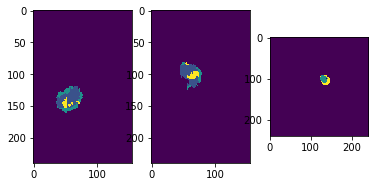

In [5]:
import os
import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt
%matplotlib inline

directory = os.path.join('..', 'BraTS2018', 'data')
segs = ['HGG/Brats18_2013_20_1', 'LGG/Brats18_2013_0_1']
views = ['seg', 'flair', 't1', 't1ce', 't2']

nii = nib.load(os.path.join(directory, segs[1]+'_'+views[0]+'.nii'))
image = np.array(nii.get_data())
print (image.shape)

plt.subplot(1, 3, 1)
plt.imshow(image[120, :, :])

plt.subplot(1, 3, 2)
plt.imshow(image[:, 120, :])

plt.subplot(1, 3, 3)
plt.imshow(image[:, :, 80])

plt.show()

# See labels in slices

In [6]:
imslice = image[120, :, :]
lbl = np.unique(imslice)
print (lbl)

[0 1 2 4]


# U-Net 3D Test

In [7]:
import torch
from models import unet3d
from torch.autograd import Variable
from scipy.misc import imresize
from PIL import Image


image = np.resize(image, (240, 240, 152))   # this will affect the final mask? 
                                            # (it should be resize back and maybe some error happens)
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=0)
print (image.shape)

image = torch.from_numpy(image)
image = image.type('torch.FloatTensor')
x = Variable(image)

(1, 1, 240, 240, 152)


In [ ]:
model = unet3d(in_dim=1,out_dim=1,num_filter=4)
print (model(x))  # 1x16x120x120x76, 1x8x120x120x77

In [ ]:
# depth not work 155, 154

In [8]:
import os
import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt
%matplotlib inline

directory = '/run/user/1000/gvfs/smb-share:server=192.168.200.1,share=mri/BraTS2018/MICCAI_BraTS_2018_Data_Training'
nii = nib.load(os.path.join(directory, 'HGG/Brats18_2013_18_1_seg.nii'))
image = np.array(nii.get_data())

for s in range(image.shape[0]):
    imslice = image[s, :, :]
    lbl = np.unique(imslice)
    print (s, lbl)

# plt.imshow(image[78, :, :])

0 [-1  0]
1 [-1  0]
2 [-1  0]
3 [-1  0]
4 [-1  0]
5 [-1  0]
6 [-1  0]
7 [-1  0]
8 [-1  0]
9 [-1  0]
10 [-1  0]
11 [-1  0]
12 [-1  0]
13 [-1  0]
14 [-1  0]
15 [-1  0]
16 [-1  0]
17 [-1  0]
18 [-1  0]
19 [-1  0]
20 [-1  0]
21 [-1  0]
22 [-1  0]
23 [-1  0]
24 [-1  0]
25 [-1  0]
26 [-1  0]
27 [-1  0]
28 [-1  0]
29 [-1  0]
30 [-1  0]
31 [-1  0]
32 [-1  0]
33 [-1  0]
34 [-1  0]
35 [-1  0]
36 [-1  0]
37 [-1  0]
38 [-1  0]
39 [-1  0]
40 [-1  0]
41 [-1  0]
42 [-1  0]
43 [-1  0]
44 [-1  0]
45 [-1  0]
46 [-1  0]
47 [-1  0]
48 [-1  0]
49 [-1  0]
50 [-1  0]
51 [-1  0]
52 [-1  0]
53 [-1  0]
54 [-1  0]
55 [-1  0]
56 [-1  0]
57 [-1  0]
58 [-1  0]
59 [-1  0  2]
60 [-1  0  2]
61 [-1  0  2]
62 [-1  0  2]
63 [-1  0  2]
64 [-1  0  2]
65 [-1  0  2]
66 [-1  0  2]
67 [-1  0  2]
68 [-1  0  2]
69 [-1  0  2]
70 [-1  0  2]
71 [-1  0  2]
72 [-1  0  2]
73 [-1  0  2]
74 [-1  0  2]
75 [-1  0  2]
76 [-1  0  2]
77 [-1  0  2]
78 [-1  0  1  2  4]
79 [-1  0  1  2  4]
80 [-1  0  1  2  4]
81 [-1  0  1  2  4]
82 [-1  0  1  2

In [11]:
import numpy as np

a = np.array([[0, 1, 2, -1, 255], [0, 1, 2, -1, 255]])
a[a > 5] = 0
print (a)
a[a < 0] = 0
print (a)

[[ 0  1  2 -1  0]
 [ 0  1  2 -1  0]]
[[0 1 2 0 0]
 [0 1 2 0 0]]
